# Social Network Analysis of the French novel Les Miserables (Victor Hugo)


A summary of the novel can be found at https://www.sparknotes.com/lit/lesmis/summary/


- lesmis.gml - contains the weighted network of coappearances of characters
- Each node in this network is labeled by one character 
- We define coapperance as being seen in the same chapter of the novel
- An edge between two nodes represents that those two characters will appear in the same chapter
- The value of the eges represents the number of such coapperances 
- The data is sourced from D.E. Knuth, The Stanford GraphBase (https://www-cs-faculty.stanford.edu/~knuth/sgb.html)

In [1]:
# Importing networkx
import matplotlib.pyplot as plt
import networkx as nx
# Check the version
nx.__version__

'2.8.4'

In [4]:
# Load the graph
fil = nx.read_gml('../data/lesmis.gml')
fil
print(fil.order())
print(fil.size())

77
254



### Visualizing with networkx layouts

In [5]:
G = nx.florentine_families_graph()
nodes,edges = G.order(), G.size()
print ("No. of Nodes: ", nodes)
print ("No. of Edges: ", edges)


#If there are isolates, many of the algorithms will fail. You have to remove those")
print("Isolates = ",list(nx.isolates(G)))

No. of Nodes:  15
No. of Edges:  20
Isolates =  []


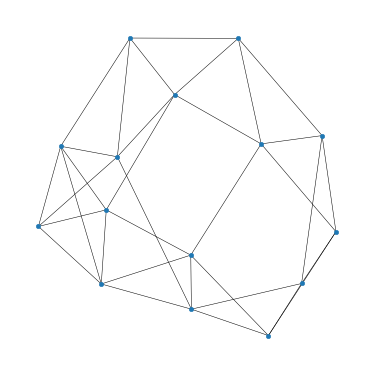

In [6]:
# Newman_watts_strogatz graph
neighbours=5
G = nx.newman_watts_strogatz_graph(nodes,neighbours,0.1)
fig = plt.figure(figsize =(5 ,5))
nx.draw(G, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5)
plt.show()

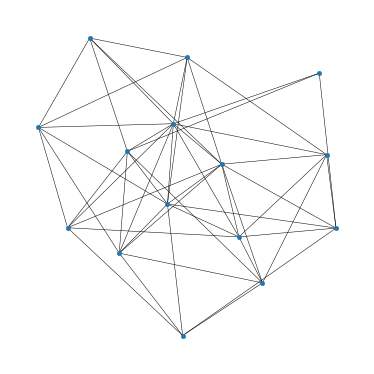

In [7]:
# Barabasi graph
G = nx.barabasi_albert_graph(nodes,neighbours)

fig = plt.figure(figsize =(5 ,5))
nx.draw(G, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5)
plt.show()

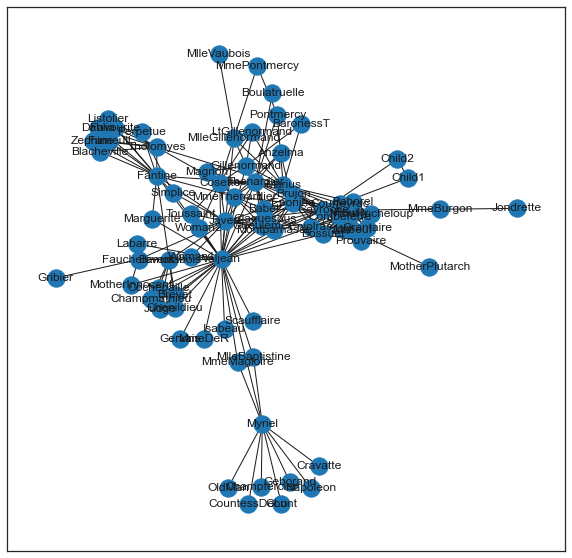

In [44]:
# Normal networkx graph
%matplotlib inline
fig = plt.figure(figsize =(10,10))
nx.draw_networkx(fil)
plt.show()

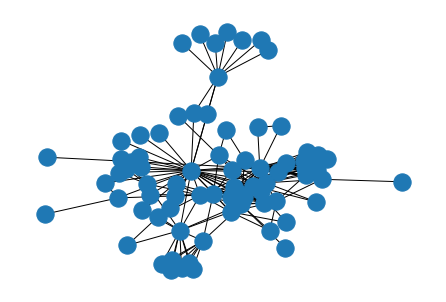

In [9]:
# Overall Graph
nx.draw(fil)
plt.show()

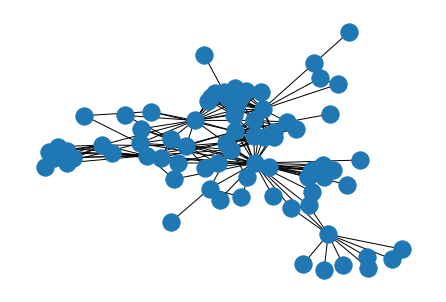

In [10]:
# Precompute the layout and then plot
pos_spring = nx.spring_layout(fil)
pos_fr = nx.fruchterman_reingold_layout(fil)
pos_fr
nx.draw(fil, pos=pos_fr)
plt.show()

### Let's list the nodes and edges with their attributes

In [11]:
# Print the nodes:
print("The nodes in the graph are: ")
list(fil.nodes())

The nodes in the graph are: 


['Myriel',
 'Napoleon',
 'MlleBaptistine',
 'MmeMagloire',
 'CountessDeLo',
 'Geborand',
 'Champtercier',
 'Cravatte',
 'Count',
 'OldMan',
 'Labarre',
 'Valjean',
 'Marguerite',
 'MmeDeR',
 'Isabeau',
 'Gervais',
 'Tholomyes',
 'Listolier',
 'Fameuil',
 'Blacheville',
 'Favourite',
 'Dahlia',
 'Zephine',
 'Fantine',
 'MmeThenardier',
 'Thenardier',
 'Cosette',
 'Javert',
 'Fauchelevent',
 'Bamatabois',
 'Perpetue',
 'Simplice',
 'Scaufflaire',
 'Woman1',
 'Judge',
 'Champmathieu',
 'Brevet',
 'Chenildieu',
 'Cochepaille',
 'Pontmercy',
 'Boulatruelle',
 'Eponine',
 'Anzelma',
 'Woman2',
 'MotherInnocent',
 'Gribier',
 'Jondrette',
 'MmeBurgon',
 'Gavroche',
 'Gillenormand',
 'Magnon',
 'MlleGillenormand',
 'MmePontmercy',
 'MlleVaubois',
 'LtGillenormand',
 'Marius',
 'BaronessT',
 'Mabeuf',
 'Enjolras',
 'Combeferre',
 'Prouvaire',
 'Feuilly',
 'Courfeyrac',
 'Bahorel',
 'Bossuet',
 'Joly',
 'Grantaire',
 'MotherPlutarch',
 'Gueulemer',
 'Babet',
 'Claquesous',
 'Montparnasse',
 'Tou

In [12]:
# print the edges:
print("The edges in the graph with their attributes are: ")
nx.get_edge_attributes(fil,'value')

The edges in the graph with their attributes are: 


{('Myriel', 'Napoleon'): 1,
 ('Myriel', 'MlleBaptistine'): 8,
 ('Myriel', 'MmeMagloire'): 10,
 ('Myriel', 'CountessDeLo'): 1,
 ('Myriel', 'Geborand'): 1,
 ('Myriel', 'Champtercier'): 1,
 ('Myriel', 'Cravatte'): 1,
 ('Myriel', 'Count'): 2,
 ('Myriel', 'OldMan'): 1,
 ('Myriel', 'Valjean'): 5,
 ('MlleBaptistine', 'MmeMagloire'): 6,
 ('MlleBaptistine', 'Valjean'): 3,
 ('MmeMagloire', 'Valjean'): 3,
 ('Labarre', 'Valjean'): 1,
 ('Valjean', 'Marguerite'): 1,
 ('Valjean', 'MmeDeR'): 1,
 ('Valjean', 'Isabeau'): 1,
 ('Valjean', 'Gervais'): 1,
 ('Valjean', 'Fantine'): 9,
 ('Valjean', 'MmeThenardier'): 7,
 ('Valjean', 'Thenardier'): 12,
 ('Valjean', 'Cosette'): 31,
 ('Valjean', 'Javert'): 17,
 ('Valjean', 'Fauchelevent'): 8,
 ('Valjean', 'Bamatabois'): 2,
 ('Valjean', 'Simplice'): 3,
 ('Valjean', 'Scaufflaire'): 1,
 ('Valjean', 'Woman1'): 2,
 ('Valjean', 'Judge'): 3,
 ('Valjean', 'Champmathieu'): 3,
 ('Valjean', 'Brevet'): 2,
 ('Valjean', 'Chenildieu'): 2,
 ('Valjean', 'Cochepaille'): 2,
 ('Valje

### Centrality analysis (degree, closeness, betweenness, eigenvector) of all the nodes

In [13]:
# Getting the eigen vector centrality
e = nx.eigenvector_centrality(fil)

# Sorting 
import operator
sorted_x = sorted(e.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_x)

[('Gavroche', 0.3178389397749768), ('Valjean', 0.2676181759885394), ('Enjolras', 0.2671786328235667), ('Marius', 0.25911114534178753), ('Bossuet', 0.24213078637474136), ('Courfeyrac', 0.23246719717021408), ('Bahorel', 0.22155360926119969), ('Joly', 0.22155360926119969), ('Combeferre', 0.21073457488115618), ('Feuilly', 0.21073457488115618), ('Mabeuf', 0.19502891203664763), ('Thenardier', 0.1878077051550095), ('Grantaire', 0.18663538887401085), ('Javert', 0.18422516321025706), ('Prouvaire', 0.17581635449396735), ('Gueulemer', 0.14543155406625), ('Babet', 0.14543155406625), ('Eponine', 0.14193827361489472), ('Claquesous', 0.14153627306562794), ('MmeHucheloup', 0.14071116072806064), ('Montparnasse', 0.13602919446668407), ('MmeThenardier', 0.12228242172143367), ('Cosette', 0.11103702398134035), ('Brujon', 0.10128691502674181), ('Fantine', 0.08975922949834117), ('Gillenormand', 0.06539729702430215), ('MlleGillenormand', 0.06316905144338801), ('Bamatabois', 0.06227506194694947), ('Tholomyes',

In [14]:
# Getting the degree centrality
e = nx.degree_centrality(fil)

# Sorting 
import operator
sorted_x = sorted(e.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_x)

[('Valjean', 0.47368421052631576), ('Gavroche', 0.2894736842105263), ('Marius', 0.25), ('Javert', 0.22368421052631576), ('Thenardier', 0.21052631578947367), ('Fantine', 0.19736842105263158), ('Enjolras', 0.19736842105263158), ('Courfeyrac', 0.17105263157894735), ('Bossuet', 0.17105263157894735), ('Bahorel', 0.15789473684210525), ('Joly', 0.15789473684210525), ('MmeThenardier', 0.14473684210526316), ('Cosette', 0.14473684210526316), ('Eponine', 0.14473684210526316), ('Mabeuf', 0.14473684210526316), ('Combeferre', 0.14473684210526316), ('Feuilly', 0.14473684210526316), ('Myriel', 0.13157894736842105), ('Grantaire', 0.13157894736842105), ('Gueulemer', 0.13157894736842105), ('Babet', 0.13157894736842105), ('Claquesous', 0.13157894736842105), ('Tholomyes', 0.11842105263157894), ('Prouvaire', 0.11842105263157894), ('Montparnasse', 0.11842105263157894), ('Bamatabois', 0.10526315789473684), ('Listolier', 0.09210526315789473), ('Fameuil', 0.09210526315789473), ('Blacheville', 0.0921052631578947

In [15]:
# Getting the closeness centrality
e = nx.closeness_centrality(fil)

# Sorting 
import operator
sorted_x = sorted(e.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_x)


[('Valjean', 0.6440677966101694), ('Marius', 0.5314685314685315), ('Thenardier', 0.5170068027210885), ('Javert', 0.5170068027210885), ('Gavroche', 0.5135135135135135), ('Enjolras', 0.4810126582278481), ('Cosette', 0.4779874213836478), ('Bossuet', 0.475), ('Gueulemer', 0.4634146341463415), ('Babet', 0.4634146341463415), ('Fantine', 0.46060606060606063), ('MmeThenardier', 0.46060606060606063), ('Montparnasse', 0.4578313253012048), ('Claquesous', 0.4523809523809524), ('Gillenormand', 0.4418604651162791), ('MlleGillenormand', 0.4418604651162791), ('Myriel', 0.4293785310734463), ('Bamatabois', 0.42696629213483145), ('Simplice', 0.4175824175824176), ('MlleBaptistine', 0.41304347826086957), ('MmeMagloire', 0.41304347826086957), ('Marguerite', 0.41304347826086957), ('Judge', 0.40425531914893614), ('Champmathieu', 0.40425531914893614), ('Brevet', 0.40425531914893614), ('Chenildieu', 0.40425531914893614), ('Cochepaille', 0.40425531914893614), ('Fauchelevent', 0.4021164021164021), ('Woman2', 0.40

In [16]:
# Getting the betweenness centrality
e = nx.betweenness_centrality(fil)

# Sorting 
import operator
sorted_x = sorted(e.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_x)

[('Valjean', 0.5699890527836184), ('Myriel', 0.17684210526315788), ('Gavroche', 0.16511250242584766), ('Marius', 0.132032488621946), ('Fantine', 0.12964454098819422), ('Thenardier', 0.07490122123424225), ('Javert', 0.05433155966478436), ('MlleGillenormand', 0.047598927875243675), ('Enjolras', 0.0425533568221771), ('Tholomyes', 0.04062934817733579), ('Bossuet', 0.03075365017995782), ('MmeThenardier', 0.02900241873046176), ('Mabeuf', 0.027661236424394314), ('Fauchelevent', 0.026491228070175437), ('MmeBurgon', 0.02631578947368421), ('Cosette', 0.023796253454148188), ('Gillenormand', 0.02021062158319776), ('Eponine', 0.011487550654163002), ('Simplice', 0.008640295033483888), ('Bamatabois', 0.008040935672514621), ('Pontmercy', 0.006925438596491228), ('Courfeyrac', 0.00526702988198833), ('Gueulemer', 0.004960383978389518), ('Babet', 0.004960383978389518), ('Claquesous', 0.00486180419559921), ('Montparnasse', 0.0038738298738298727), ('Bahorel', 0.0021854883087570067), ('Joly', 0.0021854883087

### Pearson Correlation coefficient between each pair of centrality ( vectors)

In [17]:
# Pearson correlation coefficient for the whole graph is: 

print("Pearson correlation coefficient for the whole graph is: ",nx.degree_pearson_correlation_coefficient(fil))

Pearson correlation coefficient for the whole graph is:  -0.1652251344223694


In [18]:
# Pearson correlation coefficient for each of the edges in the graph are:
x = list(fil.edges())
for i in x:
        print(i,"------>",nx.degree_pearson_correlation_coefficient(fil , nodes = i))
            

('Myriel', 'Napoleon') ------> -1.0
('Myriel', 'MlleBaptistine') ------> -1.0
('Myriel', 'MmeMagloire') ------> -1.0
('Myriel', 'CountessDeLo') ------> -1.0
('Myriel', 'Geborand') ------> -1.0
('Myriel', 'Champtercier') ------> -1.0
('Myriel', 'Cravatte') ------> -1.0
('Myriel', 'Count') ------> -1.0
('Myriel', 'OldMan') ------> -1.0
('Myriel', 'Valjean') ------> -1.0
('MlleBaptistine', 'MmeMagloire') ------> nan
('MlleBaptistine', 'Valjean') ------> -1.0
('MmeMagloire', 'Valjean') ------> -1.0
('Labarre', 'Valjean') ------> -1.0
('Valjean', 'Marguerite') ------> -1.0
('Valjean', 'MmeDeR') ------> -1.0
('Valjean', 'Isabeau') ------> -1.0
('Valjean', 'Gervais') ------> -1.0
('Valjean', 'Fantine') ------> -1.0
('Valjean', 'MmeThenardier') ------> -1.0
('Valjean', 'Thenardier') ------> -1.0
('Valjean', 'Cosette') ------> -1.0
('Valjean', 'Javert') ------> -1.0
('Valjean', 'Fauchelevent') ------> -1.0
('Valjean', 'Bamatabois') ------> -1.0
('Valjean', 'Simplice') ------> -1.0
('Valjean', '

/Users/avinashvaka/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [19]:
G = fil
cc=nx.closeness_centrality(G)
dc=nx.degree_centrality(G)
bc = nx.betweenness_centrality(G)
ec = nx.eigenvector_centrality(G,max_iter=1000)
sorted_dc=sorted(dc.items())
sorted_bc=sorted(bc.items())
sorted_cc=sorted(cc.items())
sorted_ec=sorted(ec.items())
#extract the centralities
deg_data=[y for x,y in sorted_dc]
close_data=[y for x,y in sorted_cc]
betw_data=[y for x,y in sorted_bc]
eig_data=[y for x,y in sorted_ec]

from scipy.stats.stats import pearsonr
r1=pearsonr(deg_data,betw_data)
s= "\n Pearson Correlation Coefficient between degree central and betweenness: " + repr(r1)
print (s)
r2=pearsonr(deg_data,close_data)
s= "\n Pearson Correlation Coefficient between degree central and closeness: " + repr(r2)
print (s)
r3=pearsonr(betw_data,close_data)
s= "\n Pearson Correlation Coefficient between betweennness and closeness: " + repr(r3)
print (s)
r4=pearsonr(betw_data,eig_data)
s= "\n Pearson Correlation Coefficient between betweennness and eigenvector : " + repr(r4)
print (s)


 Pearson Correlation Coefficient between degree central and betweenness: (0.7468277390180281, 6.278534881336606e-15)

 Pearson Correlation Coefficient between degree central and closeness: (0.7996961811507092, 2.755674991475948e-18)

 Pearson Correlation Coefficient between betweennness and closeness: (0.6287339146009842, 9.200824713262712e-10)

 Pearson Correlation Coefficient between betweennness and eigenvector : (0.42310812144122967, 0.00012620658358078856)


### Degree distribution histogram and a log-log plot

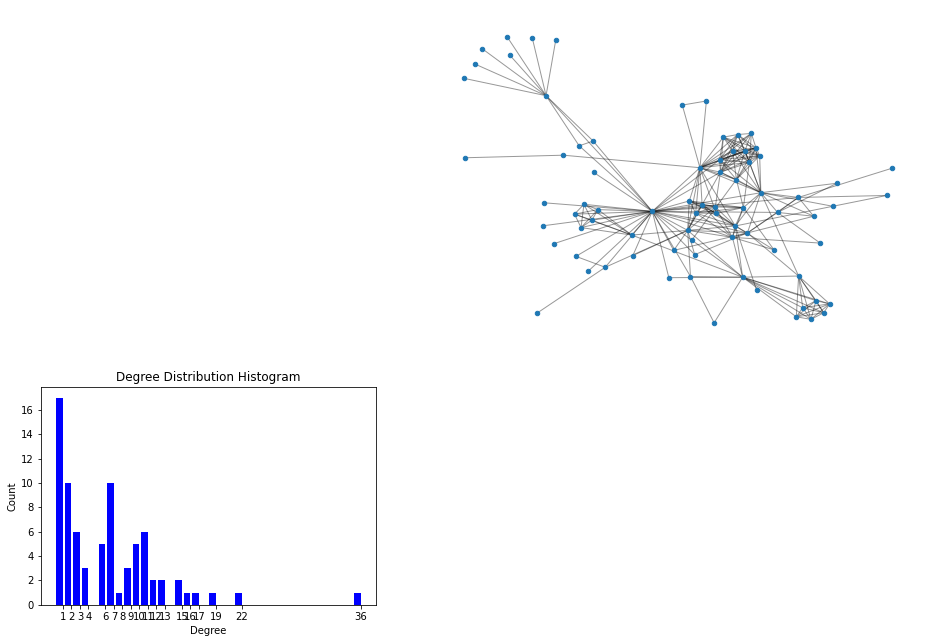

In [20]:
import collections
import matplotlib.pyplot as plt
import networkx as nx

G = fil

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Distribution Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([1, 1, 1.2, 1.2])
Gcc = sorted((G.subgraph(c) for c in nx.connected_components(G)), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

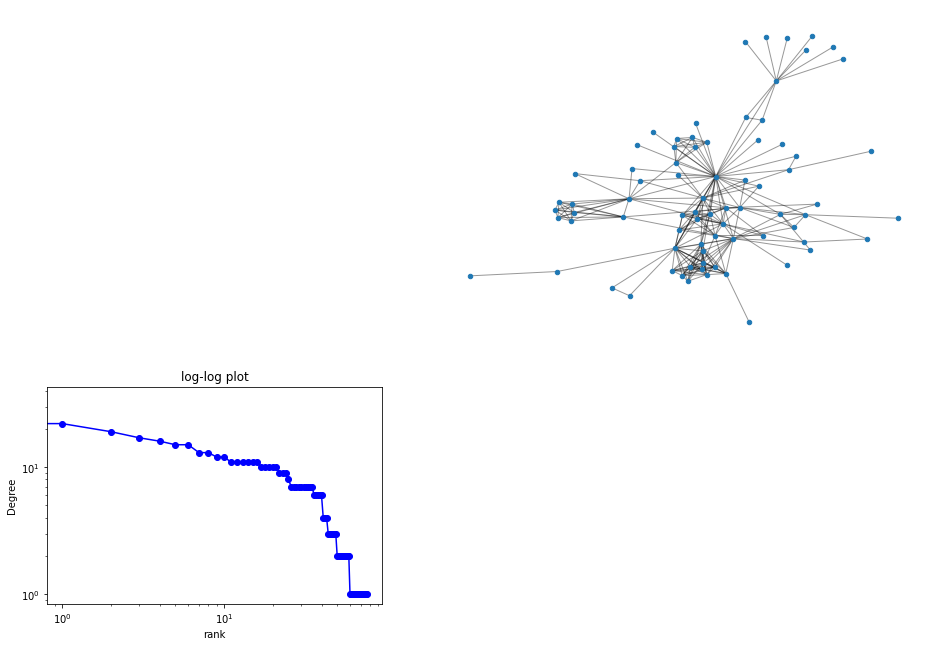

In [21]:
import collections
import matplotlib.pyplot as plt
import networkx as nx

G = fil

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
# degreeCount = collections.Counter(degree_sequence)
# deg, cnt = zip(*degreeCount.items())

# fig, ax = plt.subplots()
# plt.bar(deg, cnt, width=0.80, color='b')
plt.loglog(degree_sequence,'b-',marker='o')
plt.title("log-log plot")
plt.ylabel("Degree")
plt.xlabel("rank")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([1, 1, 1.2, 1.2])
Gcc = sorted((G.subgraph(c) for c in nx.connected_components(G)), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

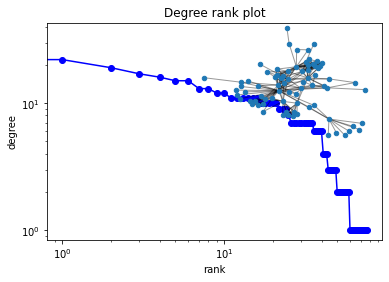

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
G = fil

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45,0.45,0.45,0.45])
Gcc=sorted((G.subgraph(c) for c in nx.connected_components(G)), key = len, reverse=True)[0]
pos=nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc,pos,node_size=20)
nx.draw_networkx_edges(Gcc,pos,alpha=0.4)

plt.savefig("degree_histogram.png")
plt.show()

### Degree assortativity for the nodes

In [23]:
# degree assortativity of the nodes:

print("The degree assortativity for the whole graph is: ", nx.degree_assortativity_coefficient(fil))

print("The degree assortativity for each pair of nodes is: ")
x = list(fil.edges())
for i in x:
        print(i,"------>",nx.degree_assortativity_coefficient(fil , nodes = i))

The degree assortativity for the whole graph is:  -0.16522513442237025
The degree assortativity for each pair of nodes is: 
('Myriel', 'Napoleon') ------> -1.0
('Myriel', 'MlleBaptistine') ------> -1.0
('Myriel', 'MmeMagloire') ------> -1.0
('Myriel', 'CountessDeLo') ------> -1.0
('Myriel', 'Geborand') ------> -1.0
('Myriel', 'Champtercier') ------> -1.0
('Myriel', 'Cravatte') ------> -1.0
('Myriel', 'Count') ------> -1.0
('Myriel', 'OldMan') ------> -1.0
('Myriel', 'Valjean') ------> -1.0
('MlleBaptistine', 'MmeMagloire') ------> nan
('MlleBaptistine', 'Valjean') ------> -1.0
('MmeMagloire', 'Valjean') ------> -1.0
('Labarre', 'Valjean') ------> -1.0
('Valjean', 'Marguerite') ------> -1.0
('Valjean', 'MmeDeR') ------> -1.0
('Valjean', 'Isabeau') ------> -1.0
('Valjean', 'Gervais') ------> -1.0
('Valjean', 'Fantine') ------> -1.0
('Valjean', 'MmeThenardier') ------> -1.0
('Valjean', 'Thenardier') ------> -1.0
('Valjean', 'Cosette') ------> -1.0
('Valjean', 'Javert') ------> -1.0
('Valj

/Users/avinashvaka/opt/anaconda3/lib/python3.9/site-packages/networkx/algorithms/assortativity/correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


### Let's find the shortest paths between the pairs of nodes

In [24]:
# List of all nodes is 'x'
x = list(fil.nodes())

for i in range(len(x)):
    for j in range(len(x)):
        shortest = list(nx.all_shortest_paths(fil,x[i],x[j]))
        print(shortest[0], len(shortest[0]))

['Myriel'] 1
['Myriel', 'Napoleon'] 2
['Myriel', 'MlleBaptistine'] 2
['Myriel', 'MmeMagloire'] 2
['Myriel', 'CountessDeLo'] 2
['Myriel', 'Geborand'] 2
['Myriel', 'Champtercier'] 2
['Myriel', 'Cravatte'] 2
['Myriel', 'Count'] 2
['Myriel', 'OldMan'] 2
['Myriel', 'Valjean', 'Labarre'] 3
['Myriel', 'Valjean'] 2
['Myriel', 'Valjean', 'Marguerite'] 3
['Myriel', 'Valjean', 'MmeDeR'] 3
['Myriel', 'Valjean', 'Isabeau'] 3
['Myriel', 'Valjean', 'Gervais'] 3
['Myriel', 'Valjean', 'Fantine', 'Tholomyes'] 4
['Myriel', 'Valjean', 'Fantine', 'Listolier'] 4
['Myriel', 'Valjean', 'Fantine', 'Fameuil'] 4
['Myriel', 'Valjean', 'Fantine', 'Blacheville'] 4
['Myriel', 'Valjean', 'Fantine', 'Favourite'] 4
['Myriel', 'Valjean', 'Fantine', 'Dahlia'] 4
['Myriel', 'Valjean', 'Fantine', 'Zephine'] 4
['Myriel', 'Valjean', 'Fantine'] 3
['Myriel', 'Valjean', 'MmeThenardier'] 3
['Myriel', 'Valjean', 'Thenardier'] 3
['Myriel', 'Valjean', 'Cosette'] 3
['Myriel', 'Valjean', 'Javert'] 3
['Myriel', 'Valjean', 'Fauchelevent

['Valjean', 'Fantine', 'Tholomyes'] 3
['Valjean', 'Fantine', 'Listolier'] 3
['Valjean', 'Fantine', 'Fameuil'] 3
['Valjean', 'Fantine', 'Blacheville'] 3
['Valjean', 'Fantine', 'Favourite'] 3
['Valjean', 'Fantine', 'Dahlia'] 3
['Valjean', 'Fantine', 'Zephine'] 3
['Valjean', 'Fantine'] 2
['Valjean', 'MmeThenardier'] 2
['Valjean', 'Thenardier'] 2
['Valjean', 'Cosette'] 2
['Valjean', 'Javert'] 2
['Valjean', 'Fauchelevent'] 2
['Valjean', 'Bamatabois'] 2
['Valjean', 'Fantine', 'Perpetue'] 3
['Valjean', 'Simplice'] 2
['Valjean', 'Scaufflaire'] 2
['Valjean', 'Woman1'] 2
['Valjean', 'Judge'] 2
['Valjean', 'Champmathieu'] 2
['Valjean', 'Brevet'] 2
['Valjean', 'Chenildieu'] 2
['Valjean', 'Cochepaille'] 2
['Valjean', 'Thenardier', 'Pontmercy'] 3
['Valjean', 'Thenardier', 'Boulatruelle'] 3
['Valjean', 'MmeThenardier', 'Eponine'] 3
['Valjean', 'MmeThenardier', 'Anzelma'] 3
['Valjean', 'Woman2'] 2
['Valjean', 'MotherInnocent'] 2
['Valjean', 'Fauchelevent', 'Gribier'] 3
['Valjean', 'Gavroche', 'MmeBurg

['Favourite', 'Fantine', 'Valjean', 'Champmathieu'] 4
['Favourite', 'Fantine', 'Valjean', 'Brevet'] 4
['Favourite', 'Fantine', 'Valjean', 'Chenildieu'] 4
['Favourite', 'Fantine', 'Valjean', 'Cochepaille'] 4
['Favourite', 'Tholomyes', 'Marius', 'Pontmercy'] 4
['Favourite', 'Fantine', 'Thenardier', 'Boulatruelle'] 4
['Favourite', 'Tholomyes', 'Marius', 'Eponine'] 4
['Favourite', 'Fantine', 'MmeThenardier', 'Anzelma'] 4
['Favourite', 'Tholomyes', 'Cosette', 'Woman2'] 4
['Favourite', 'Fantine', 'Valjean', 'MotherInnocent'] 4
['Favourite', 'Fantine', 'Valjean', 'Fauchelevent', 'Gribier'] 5
['Favourite', 'Tholomyes', 'Marius', 'Gavroche', 'MmeBurgon', 'Jondrette'] 6
['Favourite', 'Tholomyes', 'Marius', 'Gavroche', 'MmeBurgon'] 5
['Favourite', 'Tholomyes', 'Marius', 'Gavroche'] 4
['Favourite', 'Tholomyes', 'Cosette', 'Gillenormand'] 4
['Favourite', 'Fantine', 'MmeThenardier', 'Magnon'] 4
['Favourite', 'Tholomyes', 'Cosette', 'MlleGillenormand'] 4
['Favourite', 'Tholomyes', 'Cosette', 'MlleGil

['Perpetue', 'Fantine', 'Valjean', 'Gavroche', 'Child1'] 5
['Perpetue', 'Fantine', 'Valjean', 'Gavroche', 'Child2'] 5
['Perpetue', 'Fantine', 'Thenardier', 'Brujon'] 4
['Perpetue', 'Fantine', 'Valjean', 'Gavroche', 'MmeHucheloup'] 5
['Simplice', 'Valjean', 'Myriel'] 3
['Simplice', 'Valjean', 'Myriel', 'Napoleon'] 4
['Simplice', 'Valjean', 'MlleBaptistine'] 3
['Simplice', 'Valjean', 'MmeMagloire'] 3
['Simplice', 'Valjean', 'Myriel', 'CountessDeLo'] 4
['Simplice', 'Valjean', 'Myriel', 'Geborand'] 4
['Simplice', 'Valjean', 'Myriel', 'Champtercier'] 4
['Simplice', 'Valjean', 'Myriel', 'Cravatte'] 4
['Simplice', 'Valjean', 'Myriel', 'Count'] 4
['Simplice', 'Valjean', 'Myriel', 'OldMan'] 4
['Simplice', 'Valjean', 'Labarre'] 3
['Simplice', 'Valjean'] 2
['Simplice', 'Valjean', 'Marguerite'] 3
['Simplice', 'Valjean', 'MmeDeR'] 3
['Simplice', 'Valjean', 'Isabeau'] 3
['Simplice', 'Valjean', 'Gervais'] 3
['Simplice', 'Fantine', 'Tholomyes'] 3
['Simplice', 'Fantine', 'Listolier'] 3
['Simplice', 'Fa

['Eponine', 'MmeThenardier', 'Valjean', 'Simplice'] 4
['Eponine', 'MmeThenardier', 'Valjean', 'Scaufflaire'] 4
['Eponine', 'MmeThenardier', 'Valjean', 'Woman1'] 4
['Eponine', 'MmeThenardier', 'Valjean', 'Judge'] 4
['Eponine', 'MmeThenardier', 'Valjean', 'Champmathieu'] 4
['Eponine', 'MmeThenardier', 'Valjean', 'Brevet'] 4
['Eponine', 'MmeThenardier', 'Valjean', 'Chenildieu'] 4
['Eponine', 'MmeThenardier', 'Valjean', 'Cochepaille'] 4
['Eponine', 'Thenardier', 'Pontmercy'] 3
['Eponine', 'Thenardier', 'Boulatruelle'] 3
['Eponine'] 1
['Eponine', 'Anzelma'] 2
['Eponine', 'MmeThenardier', 'Valjean', 'Woman2'] 4
['Eponine', 'MmeThenardier', 'Valjean', 'MotherInnocent'] 4
['Eponine', 'MmeThenardier', 'Valjean', 'Fauchelevent', 'Gribier'] 5
['Eponine', 'Thenardier', 'Gavroche', 'MmeBurgon', 'Jondrette'] 5
['Eponine', 'Thenardier', 'Gavroche', 'MmeBurgon'] 4
['Eponine', 'Thenardier', 'Gavroche'] 3
['Eponine', 'Marius', 'Gillenormand'] 3
['Eponine', 'MmeThenardier', 'Magnon'] 3
['Eponine', 'Mariu

['MlleGillenormand', 'Marius', 'Mabeuf', 'MotherPlutarch'] 4
['MlleGillenormand', 'Valjean', 'Gueulemer'] 3
['MlleGillenormand', 'Valjean', 'Babet'] 3
['MlleGillenormand', 'Valjean', 'Claquesous'] 3
['MlleGillenormand', 'Valjean', 'Montparnasse'] 3
['MlleGillenormand', 'Valjean', 'Toussaint'] 3
['MlleGillenormand', 'Valjean', 'Gavroche', 'Child1'] 4
['MlleGillenormand', 'Valjean', 'Gavroche', 'Child2'] 4
['MlleGillenormand', 'Valjean', 'Thenardier', 'Brujon'] 4
['MlleGillenormand', 'Valjean', 'Gavroche', 'MmeHucheloup'] 4
['MmePontmercy', 'MlleGillenormand', 'Valjean', 'Myriel'] 4
['MmePontmercy', 'MlleGillenormand', 'Valjean', 'Myriel', 'Napoleon'] 5
['MmePontmercy', 'MlleGillenormand', 'Valjean', 'MlleBaptistine'] 4
['MmePontmercy', 'MlleGillenormand', 'Valjean', 'MmeMagloire'] 4
['MmePontmercy', 'MlleGillenormand', 'Valjean', 'Myriel', 'CountessDeLo'] 5
['MmePontmercy', 'MlleGillenormand', 'Valjean', 'Myriel', 'Geborand'] 5
['MmePontmercy', 'MlleGillenormand', 'Valjean', 'Myriel', '

['Bahorel', 'Marius', 'Tholomyes', 'Blacheville'] 4
['Bahorel', 'Marius', 'Tholomyes', 'Favourite'] 4
['Bahorel', 'Marius', 'Tholomyes', 'Dahlia'] 4
['Bahorel', 'Marius', 'Tholomyes', 'Zephine'] 4
['Bahorel', 'Gavroche', 'Valjean', 'Fantine'] 4
['Bahorel', 'Gavroche', 'Valjean', 'MmeThenardier'] 4
['Bahorel', 'Gavroche', 'Thenardier'] 3
['Bahorel', 'Marius', 'Cosette'] 3
['Bahorel', 'Gavroche', 'Javert'] 3
['Bahorel', 'Gavroche', 'Valjean', 'Fauchelevent'] 4
['Bahorel', 'Gavroche', 'Valjean', 'Bamatabois'] 4
['Bahorel', 'Gavroche', 'Valjean', 'Fantine', 'Perpetue'] 5
['Bahorel', 'Gavroche', 'Valjean', 'Simplice'] 4
['Bahorel', 'Gavroche', 'Valjean', 'Scaufflaire'] 4
['Bahorel', 'Gavroche', 'Valjean', 'Woman1'] 4
['Bahorel', 'Gavroche', 'Valjean', 'Judge'] 4
['Bahorel', 'Gavroche', 'Valjean', 'Champmathieu'] 4
['Bahorel', 'Gavroche', 'Valjean', 'Brevet'] 4
['Bahorel', 'Gavroche', 'Valjean', 'Chenildieu'] 4
['Bahorel', 'Gavroche', 'Valjean', 'Cochepaille'] 4
['Bahorel', 'Marius', 'Pontme

['Child1', 'Gavroche', 'Valjean'] 3
['Child1', 'Gavroche', 'Valjean', 'Marguerite'] 4
['Child1', 'Gavroche', 'Valjean', 'MmeDeR'] 4
['Child1', 'Gavroche', 'Valjean', 'Isabeau'] 4
['Child1', 'Gavroche', 'Valjean', 'Gervais'] 4
['Child1', 'Gavroche', 'Marius', 'Tholomyes'] 4
['Child1', 'Gavroche', 'Valjean', 'Fantine', 'Listolier'] 5
['Child1', 'Gavroche', 'Valjean', 'Fantine', 'Fameuil'] 5
['Child1', 'Gavroche', 'Valjean', 'Fantine', 'Blacheville'] 5
['Child1', 'Gavroche', 'Valjean', 'Fantine', 'Favourite'] 5
['Child1', 'Gavroche', 'Valjean', 'Fantine', 'Dahlia'] 5
['Child1', 'Gavroche', 'Valjean', 'Fantine', 'Zephine'] 5
['Child1', 'Gavroche', 'Valjean', 'Fantine'] 4
['Child1', 'Gavroche', 'Valjean', 'MmeThenardier'] 4
['Child1', 'Gavroche', 'Thenardier'] 3
['Child1', 'Gavroche', 'Valjean', 'Cosette'] 4
['Child1', 'Gavroche', 'Javert'] 3
['Child1', 'Gavroche', 'Valjean', 'Fauchelevent'] 4
['Child1', 'Gavroche', 'Valjean', 'Bamatabois'] 4
['Child1', 'Gavroche', 'Valjean', 'Fantine', 'Pe

### Diameter of the graph 

In [25]:
print("The diamter of the graph is: ",nx.diameter(fil))

The diamter of the graph is:  5


### Network density

In [26]:
print("The network density of the graph is: ",nx.density(fil))

The network density of the graph is:  0.08680792891319207


### Top edges in terms of edge-betweenness

In [27]:
# calculate the edge betweenness
ed_bw = nx.edge_betweenness_centrality(fil)
# Sort in descending order
all_scores = sorted(ed_bw.values(),reverse = True)
# Select top ten
top10_scores = all_scores[0:10]
for i in top10_scores:
    for j in ed_bw.keys():
        if ed_bw[j] == i :
            print(j,"---->",ed_bw[j])
            break

('Myriel', 'Valjean') ----> 0.18318523581681478
('Valjean', 'Gavroche') ----> 0.08298247284530984
('Valjean', 'Fantine') ----> 0.07620427321283742
('MmeBurgon', 'Gavroche') ----> 0.05126452494873548
('Valjean', 'MlleGillenormand') ----> 0.045040847642522294
('Valjean', 'Marius') ----> 0.04430736242032529
('Tholomyes', 'Marius') ----> 0.04426433760397012
('Valjean', 'Bossuet') ----> 0.04227784539256207
('Valjean', 'Enjolras') ----> 0.03934925768953828
('Valjean', 'Fauchelevent') ----> 0.03638992586361008


### Ego network for the top 3 nodes ( in terms of degree centrality) and their alters

Valjean 

The list of alters is:  {'MlleBaptistine', 'Gillenormand', 'Javert', 'Brevet', 'Gueulemer', 'Valjean', 'Montparnasse', 'Cosette', 'Myriel', 'MmeDeR', 'Toussaint', 'Claquesous', 'Champmathieu', 'Woman1', 'Enjolras', 'Fauchelevent', 'Gervais', 'Judge', 'Labarre', 'Isabeau', 'Woman2', 'Cochepaille', 'MlleGillenormand', 'Marguerite', 'Babet', 'Bamatabois', 'Chenildieu', 'Simplice', 'MmeThenardier', 'MotherInnocent', 'MmeMagloire', 'Scaufflaire', 'Thenardier', 'Marius', 'Bossuet', 'Gavroche', 'Fantine'}


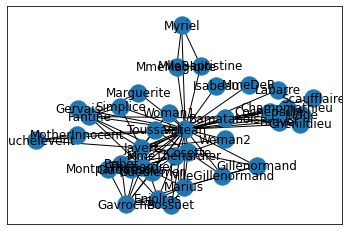

Gavroche 

The list of alters is:  {'MmeHucheloup', 'Javert', 'Brujon', 'Prouvaire', 'Gueulemer', 'Valjean', 'Montparnasse', 'Child1', 'Feuilly', 'Grantaire', 'MmeBurgon', 'Enjolras', 'Mabeuf', 'Joly', 'Bahorel', 'Babet', 'Courfeyrac', 'Thenardier', 'Gavroche', 'Marius', 'Bossuet', 'Child2', 'Combeferre'}


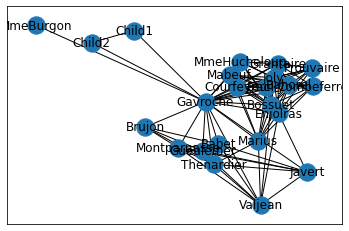

Marius 

The list of alters is:  {'Gillenormand', 'Valjean', 'Feuilly', 'Cosette', 'LtGillenormand', 'Eponine', 'Enjolras', 'BaronessT', 'Mabeuf', 'Joly', 'Pontmercy', 'MlleGillenormand', 'Bahorel', 'Courfeyrac', 'Thenardier', 'Tholomyes', 'Marius', 'Bossuet', 'Gavroche', 'Combeferre'}


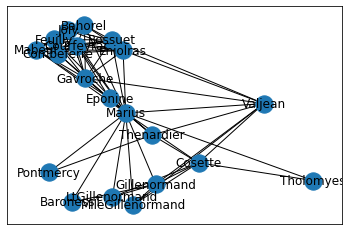

In [28]:
# Calculate the degree centrality
all_degree = nx.degree_centrality(fil)
# Sort in descneding order
all_dscores = sorted(all_degree.values(),reverse = True)
# Select top three
top3_dscores = all_dscores[0:3]
# draw th ego networks
k = 0
l = 0 
temp = []
for i in top3_dscores:
    for j in all_degree.keys():
        if all_degree[j] == i :
            print(j,"\n")
            temp.append(j)
            ego = nx.generators.ego.ego_graph(fil,j,1)
            print("The list of alters is: ",ego.nodes()-[i])
            nx.draw_networkx(ego,pos=nx.spring_layout(fil))
            plt.show()
            break

### Similarity between nodes. 
#### Top 5 pairs in terms of structural similarity

{'MlleBaptistine', 'Gillenormand', 'Javert', 'Brevet', 'Gueulemer', 'Montparnasse', 'Cosette', 'Myriel', 'MmeDeR', 'Toussaint', 'Claquesous', 'Champmathieu', 'Woman1', 'Enjolras', 'Fauchelevent', 'Gervais', 'Judge', 'Labarre', 'Isabeau', 'Woman2', 'Cochepaille', 'MlleGillenormand', 'Marguerite', 'Babet', 'Bamatabois', 'Chenildieu', 'Simplice', 'MmeThenardier', 'MotherInnocent', 'MmeMagloire', 'Scaufflaire', 'Thenardier', 'Marius', 'Bossuet', 'Gavroche', 'Fantine'}


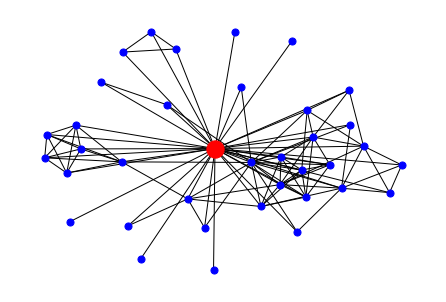

Gavroche
{'MmeHucheloup', 'Javert', 'Brujon', 'Prouvaire', 'Gueulemer', 'Valjean', 'Montparnasse', 'Child1', 'Feuilly', 'Grantaire', 'MmeBurgon', 'Enjolras', 'Mabeuf', 'Joly', 'Bahorel', 'Babet', 'Courfeyrac', 'Thenardier', 'Marius', 'Bossuet', 'Child2', 'Combeferre'}


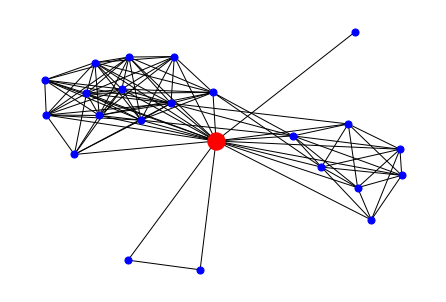

Marius
{'Gillenormand', 'Valjean', 'Feuilly', 'Cosette', 'LtGillenormand', 'Eponine', 'Enjolras', 'BaronessT', 'Mabeuf', 'Joly', 'Pontmercy', 'MlleGillenormand', 'Bahorel', 'Courfeyrac', 'Thenardier', 'Tholomyes', 'Bossuet', 'Gavroche', 'Combeferre'}


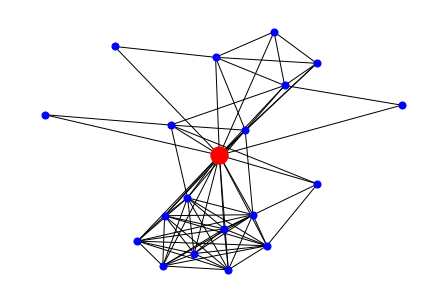

In [29]:
from operator import itemgetter
G = fil

    # find node with largest degree
node_and_degree = G.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]
    # Create ego graph of main hub
hub_ego = nx.ego_graph(G, largest_hub)
print(hub_ego.nodes() - [largest_hub])
    # Draw graph
pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color='b', node_size=50, with_labels=False)
    # Draw ego as large and red
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], node_size=300, node_color='r')
plt.show()

G = fil
print(temp[1])
    # find node with largest degree
node_and_degree = G.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-2]
    # Create ego graph of main hub
hub_ego = nx.ego_graph(G, largest_hub)
print(hub_ego.nodes() - [largest_hub])
    # Draw graph
pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color='b', node_size=50, with_labels=False)
    # Draw ego as large and red
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], node_size=300, node_color='r')
plt.show()

G = fil
print(temp[2])
    # find node with largest degree
node_and_degree = G.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-3]
    # Create ego graph of main hub
hub_ego = nx.ego_graph(G, largest_hub)
print(hub_ego.nodes() - [largest_hub])
    # Draw graph
pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color='b', node_size=50, with_labels=False)
    # Draw ego as large and red
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], node_size=300, node_color='r')
plt.show()

In [30]:
# Top 5 pairs in terms of structural similarity are: 
# By using Jaccard coefficient, we get:
sorted(list(nx.jaccard_coefficient(fil)),key=lambda x: x[2],reverse = True)[0:5]

[('OldMan', 'Champtercier', 1.0),
 ('OldMan', 'CountessDeLo', 1.0),
 ('OldMan', 'Cravatte', 1.0),
 ('OldMan', 'Count', 1.0),
 ('OldMan', 'Geborand', 1.0)]

In [31]:
#By using pearson correlation coefficient
x = list(fil.nodes())
no = []
pe = []
for i in range(len(x)):
    for j in range(len(x)):
        node = (x[i] , x[j])
        no.append(node)
        pe.append(nx.degree_pearson_correlation_coefficient(fil,node))

dictionary = dict(zip(no,pe))

m = sorted(dictionary,key=lambda x: x[1],reverse = True)
print(m[0:5])

[('Myriel', 'Zephine'), ('Napoleon', 'Zephine'), ('MlleBaptistine', 'Zephine'), ('MmeMagloire', 'Zephine'), ('CountessDeLo', 'Zephine')]


### Clustering coefficients of each node and the global clustering coefficient

In [32]:
print("The local clustering coefficients are: ")
nx.clustering(fil)

The local clustering coefficients are: 


{'Myriel': 0.06666666666666667,
 'Napoleon': 0,
 'MlleBaptistine': 1.0,
 'MmeMagloire': 1.0,
 'CountessDeLo': 0,
 'Geborand': 0,
 'Champtercier': 0,
 'Cravatte': 0,
 'Count': 0,
 'OldMan': 0,
 'Labarre': 0,
 'Valjean': 0.12063492063492064,
 'Marguerite': 1.0,
 'MmeDeR': 0,
 'Isabeau': 0,
 'Gervais': 0,
 'Tholomyes': 0.6111111111111112,
 'Listolier': 1.0,
 'Fameuil': 1.0,
 'Blacheville': 1.0,
 'Favourite': 1.0,
 'Dahlia': 1.0,
 'Zephine': 1.0,
 'Fantine': 0.3142857142857143,
 'MmeThenardier': 0.4909090909090909,
 'Thenardier': 0.4083333333333333,
 'Cosette': 0.38181818181818183,
 'Javert': 0.3235294117647059,
 'Fauchelevent': 0.3333333333333333,
 'Bamatabois': 0.6428571428571429,
 'Perpetue': 1.0,
 'Simplice': 0.6666666666666666,
 'Scaufflaire': 0,
 'Woman1': 1.0,
 'Judge': 1.0,
 'Champmathieu': 1.0,
 'Brevet': 1.0,
 'Chenildieu': 1.0,
 'Cochepaille': 1.0,
 'Pontmercy': 0.3333333333333333,
 'Boulatruelle': 0,
 'Eponine': 0.45454545454545453,
 'Anzelma': 1.0,
 'Woman2': 1.0,
 'MotherInno

In [33]:
print("The global clustering coefficient is: ",nx.average_clustering(fil))

The global clustering coefficient is:  0.5731367499320134


### Detecting sub-structures ( k clique, K core etc)

In [34]:
# Connected components
print("The connected components are:",list(nx.connected_components(fil)))
print()
print("The biconnectes components are:",list(nx.biconnected_components(fil)))
print()
print("The k-components of graph are: ",nx.k_components(fil))

The connected components are: [{'Gillenormand', 'Javert', 'Valjean', 'Feuilly', 'Boulatruelle', 'Eponine', 'MmeBurgon', 'Listolier', 'Enjolras', 'OldMan', 'Jondrette', 'Labarre', 'Zephine', 'Champtercier', 'Babet', 'CountessDeLo', 'MlleBaptistine', 'MmeHucheloup', 'Gueulemer', 'Child1', 'Favourite', 'LtGillenormand', 'Anzelma', 'Cravatte', 'Champmathieu', 'Woman2', 'Isabeau', 'Dahlia', 'Count', 'Chenildieu', 'MmeThenardier', 'Scaufflaire', 'Thenardier', 'Marius', 'Magnon', 'MotherPlutarch', 'Child2', 'Blacheville', 'Brujon', 'MlleVaubois', 'Montparnasse', 'MmePontmercy', 'Perpetue', 'MmeDeR', 'Grantaire', 'Toussaint', 'Gervais', 'Judge', 'BaronessT', 'Cochepaille', 'MlleGillenormand', 'Marguerite', 'Simplice', 'Gribier', 'Courfeyrac', 'MotherInnocent', 'Tholomyes', 'Bossuet', 'Gavroche', 'Combeferre', 'Prouvaire', 'Brevet', 'Cosette', 'Myriel', 'Claquesous', 'Woman1', 'Fauchelevent', 'Mabeuf', 'Joly', 'Pontmercy', 'Bahorel', 'Bamatabois', 'Geborand', 'Fameuil', 'MmeMagloire', 'Napoleon

In [35]:
# K-clique for k = 5
clique = list(nx.algorithms.community.k_clique_communities(fil,5))
for i in clique:
    print(list(i))

['Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Listolier', 'Tholomyes', 'Fantine', 'Zephine']
['Mabeuf', 'Joly', 'MmeHucheloup', 'Bahorel', 'Prouvaire', 'Valjean', 'Feuilly', 'Grantaire', 'Courfeyrac', 'Marius', 'Enjolras', 'Bossuet', 'Gavroche', 'Combeferre']
['Javert', 'Brujon', 'Babet', 'Gueulemer', 'Montparnasse', 'Valjean', 'Cosette', 'MmeThenardier', 'Eponine', 'Thenardier', 'Claquesous', 'Gavroche', 'Fantine']
['LtGillenormand', 'Gillenormand', 'MlleGillenormand', 'Marius', 'Valjean', 'Cosette']
['Brevet', 'Bamatabois', 'Cochepaille', 'Champmathieu', 'Valjean', 'Chenildieu', 'Judge']


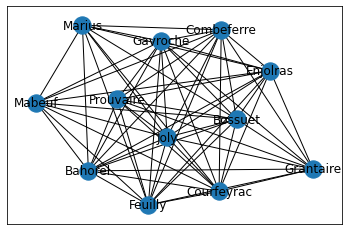

In [36]:
#K-core when k is the largest degree
core = nx.k_core(fil)
nx.draw_networkx(core)
plt.show()


### Detecting communities using Louvain method

The nodes having the same colors belong to one community


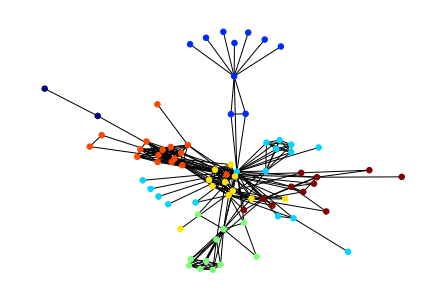

Community  1 :  ['Jondrette', 'MmeBurgon']
Community  2 :  ['Myriel', 'Napoleon', 'MlleBaptistine', 'MmeMagloire', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan']
Community  3 :  ['Labarre', 'Valjean', 'MmeDeR', 'Isabeau', 'Gervais', 'Fauchelevent', 'Bamatabois', 'Scaufflaire', 'Woman1', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'MotherInnocent', 'Gribier']
Community  4 :  ['Marguerite', 'Tholomyes', 'Listolier', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'Perpetue', 'Simplice']
Community  5 :  ['MmeThenardier', 'Thenardier', 'Javert', 'Boulatruelle', 'Eponine', 'Anzelma', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Brujon']
Community  6 :  ['Gavroche', 'Marius', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Child1', 'Child2', 'MmeHucheloup']
Community  7 :  ['Cosette', 'Pontmercy', 'Woman2', 'Gillenormand', 'Mag

In [37]:
#Louvain method
import community
from community import community_louvain
G = fil
# print(community_louvain.best_partition(G))
part = community_louvain.best_partition(G)
mod = community_louvain.modularity(part,G)

#plot, color nodes using community structure
values = [part.get(node) for node in G.nodes()]
# print(part)
print('The nodes having the same colors belong to one community')
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)
plt.show()


#print the list of communities
size = float(len(set(part.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(part.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in part.keys()
                                if part[nodes] == com]
    print("Community ",int(count),": ",list_nodes)

### Detecting communities using Clique percolation method

In [38]:
# Clique percolation method

from networkx.algorithms.community import k_clique_communities

# Let us consider communities with K = 3

cpm = list(k_clique_communities(G,3))

for i in cpm:
    print('community with K=3: ',list(i))
    print()
    

print("------------------------------------------------------------------------------------------------------")
# Let us consider communities with K = 4

cpm = list(k_clique_communities(G,4))

for i in cpm:
    print('community with K=4: ',list(i))
    print()
    

print("------------------------------------------------------------------------------------------------------")
# Let us consider communities with K = 5

cpm = list(k_clique_communities(G,5))

for i in cpm:
    print('community with K=5: ',list(i))
    print()
    

print("------------------------------------------------------------------------------------------------------")
# Let us consider communities with K = 6

cpm = list(k_clique_communities(G,6))

for i in cpm:
    print('community with K=6: ',list(i))
    print()
    

print("------------------------------------------------------------------------------------------------------")
# Let us consider communities with K = 8

cpm = list(k_clique_communities(G,8))

for i in cpm:
    print('community with K=8: ',list(i))
    print()
    
    

community with K=3:  ['Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Listolier', 'Tholomyes', 'Fantine', 'Zephine']

community with K=3:  ['MmeHucheloup', 'Gillenormand', 'Javert', 'Brujon', 'Prouvaire', 'Brevet', 'Gueulemer', 'Valjean', 'Montparnasse', 'Feuilly', 'Cosette', 'Perpetue', 'Grantaire', 'Toussaint', 'LtGillenormand', 'Eponine', 'Anzelma', 'Claquesous', 'Champmathieu', 'Enjolras', 'Woman1', 'Fauchelevent', 'Judge', 'Woman2', 'BaronessT', 'Cochepaille', 'Mabeuf', 'Joly', 'Pontmercy', 'MlleGillenormand', 'Marguerite', 'Bahorel', 'Babet', 'Bamatabois', 'Chenildieu', 'Simplice', 'MmeThenardier', 'Courfeyrac', 'MotherInnocent', 'Thenardier', 'Tholomyes', 'Marius', 'Bossuet', 'Gavroche', 'Fantine', 'Combeferre']

community with K=3:  ['MlleBaptistine', 'MmeMagloire', 'Valjean', 'Myriel']

community with K=3:  ['Gavroche', 'Child2', 'Child1']

------------------------------------------------------------------------------------------------------
community with K=4:  ['Fameuil', 

[(0, 9), (0, 14), (0, 19), (0, 26), (0, 37), (0, 56), (1, 3), (1, 4), (1, 11), (1, 16), (1, 17), (1, 29), (1, 30), (1, 32), (1, 35), (1, 39), (1, 43), (2, 3), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 17), (2, 30), (2, 31), (2, 36), (2, 39), (2, 40), (2, 41), (2, 42), (2, 50), (3, 4), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 16), (3, 29), (3, 30), (3, 31), (3, 32), (3, 35), (3, 36), (3, 40), (3, 41), (3, 42), (3, 43), (3, 50), (4, 11), (4, 16), (4, 17), (4, 29), (4, 30), (4, 32), (4, 35), (4, 39), (4, 43), (5, 7), (5, 33), (5, 38), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (6, 15), (6, 16), (6, 17), (6, 18), (6, 19), (6, 20), (6, 21), (6, 22), (6, 23), (6, 24), (6, 25), (6, 26), (6, 27), (6, 28), (6, 29), (6, 30), (6, 31), (6, 45), (6, 46), (6, 47), (6, 51), (6, 52), (6, 54), (6, 55), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (7, 15), (7, 16), (7, 17), (7, 18), (7, 19), (7, 20), (7, 21), (7, 22), (7, 23), (7, 24), (7, 25), (7, 

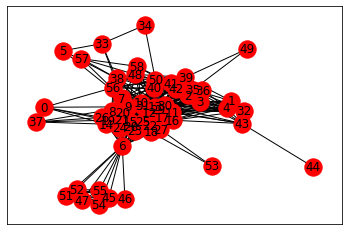

In [39]:
# Another method to find the communities using clique percolation method:
list(nx.find_cliques(G))
synthetic = nx.make_max_clique_graph(G)
# Finds the maximal cliques and treats these as nodes.
# The nodes are connected if they have common members in the original graph.
print(synthetic.edges())

nx.draw_networkx(synthetic,node_color='red')
plt.show()

### Comparing centrality measures

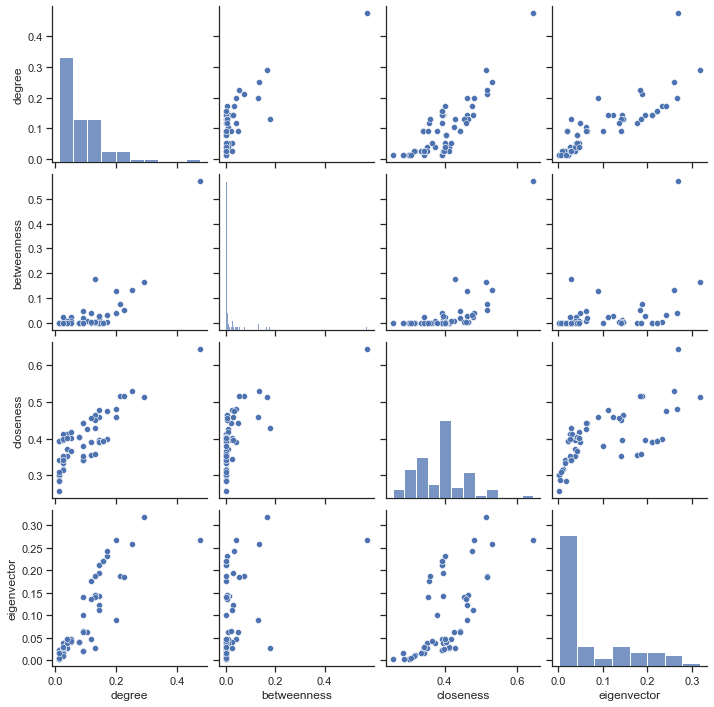

In [40]:
import pandas as pd
import seaborn as sns
sns.set(style="ticks", color_codes=True)

degc = nx.degree_centrality(G)
bet = nx.betweenness_centrality(G)
clos = nx.closeness_centrality(G)
eig = nx.eigenvector_centrality(G)

centrality_measures = {
'degree': degc,
'betweenness': bet,
'closeness': clos,
'eigenvector': eig,
}
centrality = pd.DataFrame(centrality_measures)
centrality
sns.pairplot(centrality)
plt.show()

# Final Analysis

### Graph Overview:
The graph has 77 nodes indicating 77 characters in the novel.
There are 254 edges indicting that there are 254 relationships between people.

Even though the graph has smaller clusters, on a whole it is a single component. So, every character in the novel is somehow connected to the other. The relationship might be weak or strong depending on the weights of the edges and the distance between two nodes.

### Centrality Analysis:
The top 5 degrees of centrality are as follows:

    eigen vector centrality:
                ('Gavroche', 0.31783893977497674)
                ('Valjean', 0.2676181759885393)
                ('Enjolras', 0.26717863282356663)
                ('Marius', 0.25911114534178753)
                ('Bossuet', 0.24213078637474134)

    degree centrality:
                ('Valjean', 0.47368421052631576)
                ('Gavroche', 0.2894736842105263)
                ('Marius', 0.25)
                ('Javert', 0.22368421052631576)
                ('Thenardier', 0.21052631578947367)

    closeness centrality:
                ('Valjean', 0.6440677966101694)
                ('Marius', 0.5314685314685315)
                ('Thenardier', 0.5170068027210885)
                ('Javert', 0.5170068027210885)
                ('Gavroche', 0.5135135135135135)

    betweenness centrality:
                ('Valjean', 0.5699890527836184)
                ('Myriel', 0.17684210526315788)
                ('Gavroche', 0.16511250242584766)
                ('Marius', 0.132032488621946)
                ('Fantine', 0.12964454098819422)


By looking at the centrality values, we can easily say that 'Valjean' is the protagonist of the novel without even seeing the cover face of the book.
Valjean is related to 47% of the characters (about 36 out of 77) directly. The next best being 28% (about 21 out of 77). This clearly imdicates that he is the most popular character of the novel.

The most popular person may not be the most important person. This is the difference between degree centrality and betweenness centrality.

We consider the node with highest betweenness centrality to be the most important node of a social network graph because it is like a bridge which connects two entirely different components of the graph. That one character can change a lot in the plot. So, in this novel, the highest degree centrality is for 'Valjean' only. So we can conclude that he is the most important of all.

One more interesting point that we can take a look at is that, Myriel has the second highest betweennes centrality but his degree centrality is very high. So we can say that he is an introvert wo doesn't have many relationships but he is very important for the plot of the novel. So he has acted as a bridge between many characters and has been helpful to his acquaintances. 

There is one measure in this graph where we see a differnt result. 'Jean Valjean' is not the one whi has the higest measure in this. For eigen vector centrality, the highest value is attained by 'Gavroche'. So, we can say that he is the most influential person in the plot of the novel.

Coming to the correlation plot,
    i) We can see that most of the values of betweenness centrality are near to 0. So it is very less. This shows that there are        very few important people and can also mean that the no. of unconnected components is very less because the edges that          work as bridges are less in this case.
    ii) We can see that closeness centrality is spread out like a normal distribution. This says that the central nodes are of 
        average number.
    iii) We can see that both degree cetrality and eigen-vector centrality have more values near 0 and decrease further. So we can say that there are not so many characters which are popular.
    iv) Betweenness centrality is positively correlated to all other centralities but the correlation is very low. So it means that important charcaters may not be popular or central or inluential. 
    v) All other centralities are positively correlated to all other centralities because usually popular,influential and central go hand in had with each other. centralities. A central node can be popular, central and influential.

### Community Detection:

Some of the communities detected here are:
            
            community with K=3:  ['Tholomyes', 'Zephine', 'Listolier', 'Favourite', 'Blacheville', 'Fantine', 'Fameuil', 'Dahlia']

            community with K=3:  ['MotherInnocent', 'MmeThenardier', 'Cochepaille', 'Fantine', 'MlleGillenormand', 'Joly', 'Gueulemer', 'Marius', 'BaronessT', 'Bossuet', 'Javert', 'Brujon', 'MmeHucheloup', 'Enjolras', 'Bamatabois', 'Brevet', 'Toussaint', 'LtGillenormand', 'Grantaire', 'Simplice', 'Gavroche', 'Courfeyrac', 'Montparnasse', 'Pontmercy', 'Mabeuf', 'Claquesous', 'Tholomyes', 'Champmathieu', 'Woman2', 'Bahorel', 'Fauchelevent', 'Perpetue', 'Thenardier', 'Valjean', 'Babet', 'Anzelma', 'Chenildieu', 'Gillenormand', 'Eponine', 'Judge', 'Prouvaire', 'Feuilly', 'Combeferre', 'Cosette', 'Woman1', 'Marguerite']

            community with K=3:  ['MlleBaptistine', 'Myriel', 'MmeMagloire', 'Valjean']

            community with K=3:  ['Child1', 'Child2', 'Gavroche']

            community with K=4:  ['Tholomyes', 'Zephine', 'Listolier', 'Favourite', 'Blacheville', 'Fantine', 'Fameuil', 'Dahlia']

            community with K=4:  ['Gavroche', 'MmeThenardier', 'Courfeyrac', 'Montparnasse', 'Mabeuf', 'Claquesous', 'Woman2', 'Bahorel', 'Thenardier', 'Valjean', 'Babet', 'Fantine', 'MlleGillenormand', 'Anzelma', 'Joly', 'Gueulemer', 'Marius', 'Javert', 'Brujon', 'MmeHucheloup', 'Eponine', 'Gillenormand', 'Prouvaire', 'Enjolras', 'Bamatabois', 'Feuilly', 'Combeferre', 'Toussaint', 'LtGillenormand', 'Cosette', 'Grantaire', 'Simplice', 'Bossuet']

            community with K=4:  ['MlleBaptistine', 'Myriel', 'MmeMagloire', 'Valjean']

            community with K=4:  ['Judge', 'Bamatabois', 'Valjean', 'Brevet', 'Cochepaille', 'Champmathieu', 'Chenildieu']

We can see that the characters that occur in the same frame, or closeby in the novel are grouped into the same communities. For example, Jean Valjean was seen with Myriel most of the time. So, irrespective of K value, always these both are in the same component. 

### Analysis on the structural similarity:

The structural similarity is 1 for a lot of nodes whose degree is also 1. This is not a very good measure atleast when the degree is low because everyone who is connected to valjean alone will have the same structural similarity.
And with Jaccard similarity, as it is the length(intersection) by length(union). So if the similarity is 1, then it means that the intersection and union are of the same length. So it basically leads to both the nodes having almost the same degree centrality if the Jaccard coefficient is 1.


### Analysing the clusters, density and diameter:

The global clustering coefficient is based on the number of connected triplets. It gives an indication of the clustering in the whole network on a whole. The value we have got is 0.5731367499320134. This means that around 57% of the total number of triplets are closed triplets.

The diameter (longest path between any two characters) is 5. 
This means that from any one character the maximum that any other character would be away from that character would be through 5 other characters. The average distance between any two characters is 2.6. This shows that each distinct character is generally 2 to 3 characters away from any other character.

The network density of the graph is around 8.6% only. This shows that the graph is actually very sparse. 8% of 77-C-2 is around 77 out of the 2926 distinct edges possible. 


### Other interesting observations:

The novel is a single component. This means everyone in the novel knows everyone else atleast indirectly. One of the most interesting observation is Gavroche's eigen-vector centrality. This character is the most influential character because it has the most influencing connections in the novel. But his degree centrality is still low, that is he does not have the most connections. Jean
Valjean's clustering coefficient is comparatively, and it means that many of his acquaintances don’t know one another. And several other characters also have very high clustering coefficients, so their networks are comparatively smaller and denser than Valjean’s. Valjean beats everyone by a very high margin in betweenness centrality and the degree centrality. This is where he scores more than the rest and is concluded as the protagonist. 